<a href="https://colab.research.google.com/github/polinka001/Data-Science-portfolio/blob/main/Doordash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import zipfile
import os

In [5]:
uploaded = files.upload()

Saving datasets.zip to datasets (1).zip


In [6]:
zip_path = 'datasets.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall('dataset')
  # Пишем как 'datast' название папки куда мы будет анзипить наш файл

In [7]:
import pandas as pd

df = pd.read_csv("/content/dataset/datasets/historical_data.csv")

In [8]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [10]:
df['order_protocol'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [12]:
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at'])

In [13]:
from datetime import datetime
df['busy_dasher_ratio'] = (df['total_busy_dashers'] / df['total_onshift_dashers'])

In [14]:
df['estimated_non_prep_duration'] = (df['estimated_order_place_duration'] + df['estimated_store_to_consumer_driving_duration'])

In [15]:
order_protocol_dummies = pd.get_dummies(df.order_protocol, dtype = int)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_dummies_')
order_protocol_dummies.head()

,order_protocol_dummies_1.0,order_protocol_dummies_2.0,order_protocol_dummies_3.0,order_protocol_dummies_4.0,order_protocol_dummies_5.0,order_protocol_dummies_6.0,order_protocol_dummies_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [16]:
market_id_dummies = pd.get_dummies(df.market_id, dtype = int)
market_id_dummies = market_id_dummies.add_prefix('market_id_dummies_')
market_id_dummies.head()

,market_id_dummies_1.0,market_id_dummies_2.0,market_id_dummies_3.0,market_id_dummies_4.0,market_id_dummies_5.0,market_id_dummies_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [17]:
store_primary_category_dummies = pd.get_dummies(df.store_primary_category, dtype = int)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('store_primary_category_dummies_')
store_primary_category_dummies.head()

,store_primary_category_dummies_afghan,store_primary_category_dummies_african,store_primary_category_dummies_alcohol,store_primary_category_dummies_alcohol-plus-food,store_primary_category_dummies_american,store_primary_category_dummies_argentine,store_primary_category_dummies_asian,store_primary_category_dummies_barbecue,store_primary_category_dummies_belgian,store_primary_category_dummies_brazilian,...,store_primary_category_dummies_southern,store_primary_category_dummies_spanish,store_primary_category_dummies_steak,store_primary_category_dummies_sushi,store_primary_category_dummies_tapas,store_primary_category_dummies_thai,store_primary_category_dummies_turkish,store_primary_category_dummies_vegan,store_primary_category_dummies_vegetarian,store_primary_category_dummies_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
unique_store_id = df['store_id'].unique().tolist()

In [19]:
unique_id_mode = {unique_id: df[df.store_id == unique_id].store_primary_category.mode()
                  for unique_id in unique_store_id}

In [20]:
import numpy as np

def fill(store_id):
  try:
    return unique_id_mode[store_id].values[0]
  except:
    return np.nan

df['nan_free_store_primary_category'] = df.store_id.apply(fill)

In [21]:
train_df = df.drop(columns = ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'nan_free_store_primary_category'], axis = 1)
train_df

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,busy_dasher_ratio,estimated_non_prep_duration
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59,0.424242,1307.0
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04,2.000000,1136.0
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41,0.000000,1136.0
3,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15,1.000000,735.0
4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50,1.000000,1096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0 days 01:05:07,1.000000,582.0
197424,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0 days 00:56:23,0.916667,1166.0
197425,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,0 days 00:50:08,1.051282,1046.0
197426,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,0 days 01:05:07,1.000000,830.0


In [22]:
train_df = pd.concat([train_df, market_id_dummies, order_protocol_dummies, store_primary_category_dummies], axis = 1)
train_df

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,store_primary_category_dummies_southern,store_primary_category_dummies_spanish,store_primary_category_dummies_steak,store_primary_category_dummies_sushi,store_primary_category_dummies_tapas,store_primary_category_dummies_thai,store_primary_category_dummies_turkish,store_primary_category_dummies_vegan,store_primary_category_dummies_vegetarian,store_primary_category_dummies_vietnamese
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,...,0,0,0,0,0,0,0,0,0,0
3,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,...,0,0,0,0,0,0,0,0,0,0
197424,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,...,0,0,0,0,0,0,0,0,0,0
197425,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,...,0,0,0,0,0,0,0,0,0,0
197426,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_df['busy_dasher_ratio'].describe()

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,busy_dasher_ratio
count,1.775900e+05
mean,NaN
std,NaN
min,-inf
25%,8.269231e-01
50%,9.622642e-01
75%,1.000000e+00
max,inf


In [24]:
np.where(np.any(~np.isfinite(train_df), axis = 0))

(array([ 0,  6,  7,  8, 10, 11, 12, 13]),)

In [25]:
train_df = train_df.replace([np.inf, -np.inf], np.nan)

In [26]:
train_df.dropna(inplace = True)
train_df.shape

(176166, 101)

In [27]:
corr = train_df.corr()

In [28]:
mask = np.triu(np.ones_like(corr, dtype = bool))

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

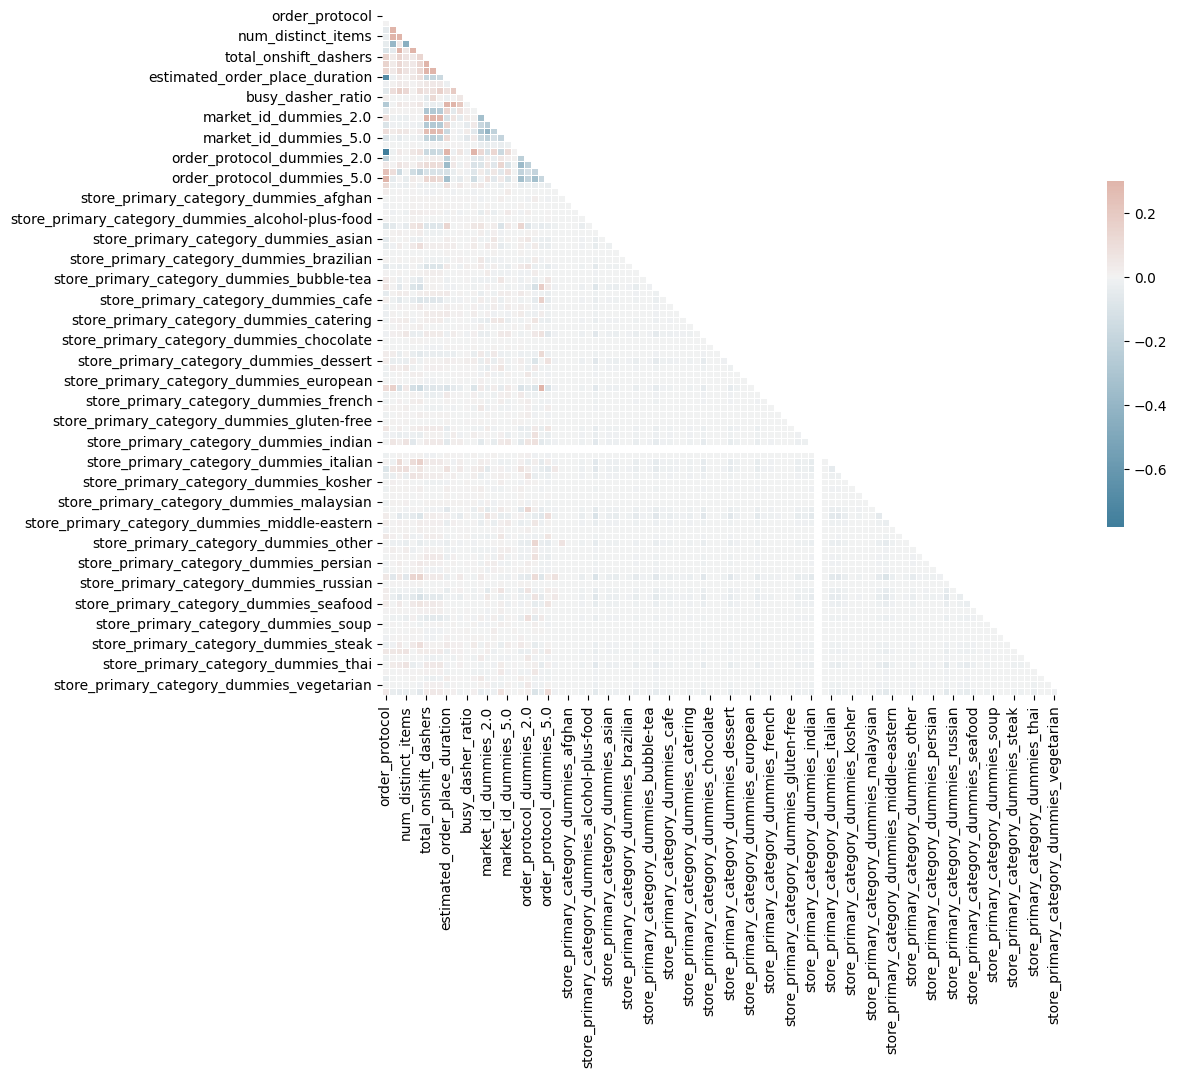

In [30]:
f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax = .3, center = 0, square=True, linewidths = .5, cbar_kws={'shrink': .5})

In [31]:
train_df['store_primary_category_dummies_indian'].describe()

,store_primary_category_dummies_indian
count,176166.000000
mean,0.035665
std,0.185455
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [32]:
def labels_to_drop(df):
  cols = df.columns
  pairs_to_drop = set()
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

# print(labels_to_drop(train_df))

# Эта функция вернёт пары для каждого столбца со всем предыдущими + с самим собой

In [33]:
def get_top_abs_correlatios (df, n):
  au_corr = df.corr().abs().unstack()
  label_to_drop = labels_to_drop(df)
  au_corr = au_corr.drop(labels = label_to_drop).sort_values(ascending = False)
  return au_corr[0: n]

In [34]:
train_df = train_df.drop(columns = ['store_primary_category_dummies_indian', 'total_busy_dashers', 'order_protocol'])

In [35]:
train_df.drop(columns = ['market_id_dummies_1.0',
 'market_id_dummies_2.0',
 'market_id_dummies_3.0',
 'market_id_dummies_4.0',
 'market_id_dummies_5.0',
 'market_id_dummies_6.0',
 'order_protocol_dummies_1.0',
 'order_protocol_dummies_2.0',
 'order_protocol_dummies_3.0',
 'order_protocol_dummies_4.0',
 'order_protocol_dummies_5.0',
 'order_protocol_dummies_6.0',
 'order_protocol_dummies_7.0'], inplace=True)

In [36]:
print(get_top_abs_correlatios(train_df, 20))

total_onshift_dashers                         total_outstanding_orders                  0.934653
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration               0.923067
total_items                                   num_distinct_items                        0.757858
subtotal                                      num_distinct_items                        0.682964
total_items                                   subtotal                                  0.556859
min_item_price                                max_item_price                            0.541311
subtotal                                      max_item_price                            0.507917
num_distinct_items                            min_item_price                            0.446640
total_items                                   min_item_price                            0.389074
estimated_order_place_duration                estimated_non_prep_duration               0.363447
delivery_duration             

In [37]:
train_df.drop(columns = ['estimated_non_prep_duration', 'store_primary_category_dummies_indonesian'], inplace = True)

In [38]:
train_df['orders_to_available_dashers_ratio'] = train_df['total_outstanding_orders'] / train_df['total_onshift_dashers']

In [39]:
train_df.drop(columns = ['total_outstanding_orders', 'total_onshift_dashers'], inplace = True)

In [40]:
train_df.shape

(176166, 82)

In [41]:
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']

In [42]:
train_df.drop(columns = ['subtotal', 'total_items'], inplace = True)

In [43]:
train_df['price_range_of_itms'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns = ['max_item_price', 'min_item_price'], inplace = True)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# def compute_vif(features):
#   vif_data = pd.DataFrame()
#   vif_data['feature'] = features
#   vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
#   return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [46]:
features = train_df.drop('delivery_duration', axis = 1).columns.to_list()
X = train_df[features].select_dtypes(include=[np.number]).dropna()

len(X.columns)

79

In [48]:
# features = train_df.drop('delivery_duration', axis = 1).columns.to_list()
X = train_df[features].select_dtypes(include=[np.number]).dropna()

def compute_vif(X):
  vif_data = pd.DataFrame()
  vif_data['feature'] = X.columns
  vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

X = train_df[features].select_dtypes(include=[np.number]).dropna()
via_data = compute_vif(X)


In [49]:
int(via_data['VIF'].iloc[-1])

10

In [50]:
# multicoll = True
# while multicoll:
#   highest_vif = int(via_data['VIF'].iloc[-1])
#   if highest_vif > 20:
#     via_data.drop([-1])

#  just in case if any vif > 20

In [51]:
selected_features = via_data['feature'].values.tolist()

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df[selected_features]
y = train_df['delivery_duration']



In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [54]:
model = RandomForestRegressor(random_state=42)

In [55]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
importances = model.feature_importances_
print(importances)

[1.99682101e-07 0.00000000e+00 3.54156922e-06 1.22470383e-05
 1.45592280e-05 2.29130926e-06 2.09910982e-05 9.91482628e-06
 1.36788918e-04 2.99987240e-05 1.36338440e-05 7.88339316e-06
 2.89682756e-05 8.51211625e-05 7.75663659e-05 9.08801712e-05
 3.62485490e-05 1.04121985e-04 2.14908743e-05 3.69813974e-04
 7.20443821e-04 1.01951775e-04 7.75415564e-05 8.64214107e-05
 2.17421045e-04 1.53107663e-04 1.28370583e-04 6.99053923e-04
 2.67941053e-04 4.00962904e-04 2.79811576e-04 8.10100141e-04
 3.44432541e-04 4.47990676e-04 4.01647484e-04 2.19599292e-04
 5.58925003e-04 5.75190059e-04 4.40553826e-04 4.32351286e-04
 7.66572579e-04 7.23274265e-04 6.57657374e-04 1.68919026e-03
 1.32017698e-03 1.48293609e-03 8.58274422e-04 1.20411003e-03
 2.10982575e-03 2.49177839e-03 1.20635243e-03 3.67571110e-03
 1.74538494e-03 1.94533610e-03 1.83544930e-03 1.83263926e-03
 3.39038443e-03 6.17666027e-03 4.71503797e-03 4.25168290e-03
 3.49411040e-03 2.95027847e-03 5.42653781e-03 4.71123911e-03
 4.97873216e-03 5.379767

In [57]:
feats = {}
for feat, imp in zip(X.columns, importances):
  feats[feat] = imp

In [58]:
importances_df = pd.DataFrame.from_dict(feats, orient='index')
importances_df

,0
store_primary_category_dummies_alcohol-plus-food,1.996821e-07
store_primary_category_dummies_chocolate,0.000000e+00
store_primary_category_dummies_belgian,3.541569e-06
store_primary_category_dummies_lebanese,1.224704e-05
store_primary_category_dummies_russian,1.455923e-05
...,...
avg_price_per_item,2.377060e-01
estimated_store_to_consumer_driving_duration,1.502937e-01
busy_dasher_ratio,1.159518e-01
orders_to_available_dashers_ratio,2.351896e-01


In [ ]:
# importances_df = importances_df.astype(int).rename(columns = {0: 'Gini-importance'})
# importances_df

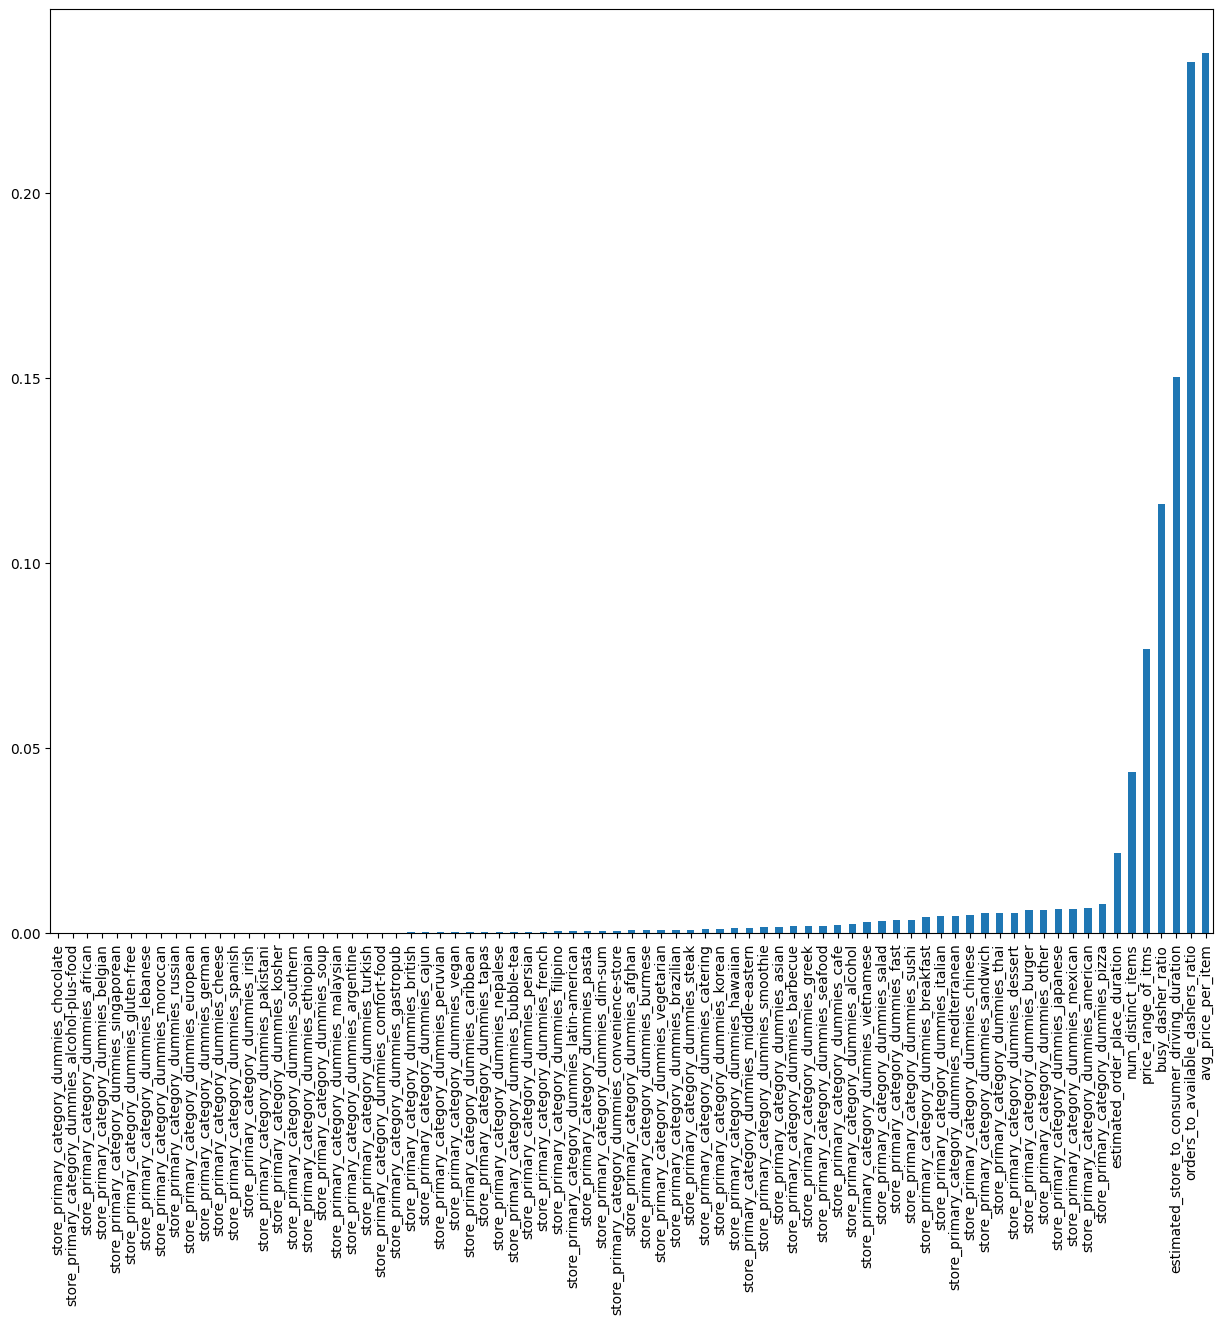

In [59]:
importances_df.sort_values([0]).plot.bar(y=0, rot=90, legend=False, figsize = (15, 12))
plt.show()

In [60]:
importances_df.sort_values([0])[-35:].index.tolist()

['store_primary_category_dummies_catering',
 'store_primary_category_dummies_korean',
 'store_primary_category_dummies_hawaiian',
 'store_primary_category_dummies_middle-eastern',
 'store_primary_category_dummies_smoothie',
 'store_primary_category_dummies_asian',
 'store_primary_category_dummies_barbecue',
 'store_primary_category_dummies_greek',
 'store_primary_category_dummies_seafood',
 'store_primary_category_dummies_cafe',
 'store_primary_category_dummies_alcohol',
 'store_primary_category_dummies_vietnamese',
 'store_primary_category_dummies_salad',
 'store_primary_category_dummies_fast',
 'store_primary_category_dummies_sushi',
 'store_primary_category_dummies_breakfast',
 'store_primary_category_dummies_italian',
 'store_primary_category_dummies_mediterranean',
 'store_primary_category_dummies_chinese',
 'store_primary_category_dummies_sandwich',
 'store_primary_category_dummies_thai',
 'store_primary_category_dummies_dessert',
 'store_primary_category_dummies_burger',
 'store

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_tain_std = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
pca = PCA().fit(X_tain_std)

In [62]:
len(np.cumsum(pca.explained_variance_ratio_))
X_train.shape

(140932, 79)

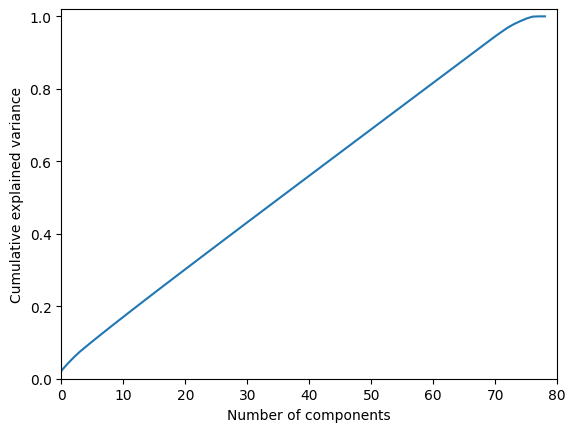

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xlim(0,80)
plt.ylim(0,1.02)
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

In [65]:
(y.values.reshape(-1,1)).shape
# X.shape
# y.shape

(176166, 1)

In [66]:
def scale(scaler, X, y):
  reshaped_y = y.values.reshape(-1,1)
  X_scaler = scaler
  y_scaler = scaler


  X_scaler.fit(X)
  X_scaled = X_scaler.transform(X)

  y_scaler.fit(reshaped_y)
  y_scaled = y_scaler.transform(reshaped_y)

  return X_scaler, y_scaler, X_scaled, y_scaled


In [75]:
X_scaler, y_scaler, X_scaled, y_scaled = scale(minmax, X, y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, random_state=42, test_size = 0.2)

In [69]:
# from sklearn.metrics import mean_squared_error

# def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
#   """Convert the scaled error to actual error"""
#   y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
#   # return RMSE with squared false
#   rmse_error = mean_squared_error(y_test, y_predict[:, 0], squared=False)
#   print('Error = '"{}".format(rmse_error) +' in '+ model_name)

#   return rmse_error, y_predict
# hz cho eto

In [76]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [ ]:
def make